In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot
import seaborn as sb

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import os

box_layout = widgets.Layout(
    display="flex",
    flex_flow="column",
    align_items="center",
    border="1px solid #E0E0E0",
    width="400px",
    padding="25px",
    border_radius="10px"
)

button_layout = widgets.Layout(width="100%", height="40px")

upload_layout = widgets.Layout(width="100%")

title = widgets.HTML(
    "<h3 style='margin-bottom:10px;'>Upload CSV Files 👇</h3>"
)

subtitle = widgets.HTML(
    "<p style='color:gray; margin-top:0;'>Select one or more CSV files to upload and save</p>"
)

train_uploader = widgets.FileUpload(
    accept='.csv',
    multiple=True,
    layout=upload_layout
)

save_button = widgets.Button(
    description='Save Files',
    button_style='primary',
    icon='save',
    layout=button_layout
)

status = widgets.HTML("<p style='color:gray;'>Waiting for upload...</p>")

output = widgets.Output()

def save_files(change=None):
    with output:
        output.clear_output()
        
        if train_uploader.value:
            saved_files = []
            for filename, file_info in train_uploader.value.items():
                with open(filename, "wb") as f:
                    f.write(file_info['content'])
                saved_files.append(filename)
            
            status.value = f"<p style='color:green;'>Saved {len(saved_files)} file(s) 👍</p>"
        else:
            status.value = "<p style='color:red;'>⚠️ No files uploaded yet</p>"

train_uploader.observe(save_files, names='value')

save_button.on_click(save_files)

card = widgets.VBox(
    [title, subtitle, train_uploader, save_button, status],
    layout=box_layout
)

display(card)
display(output)

Output()

In [4]:
data = pd.read_csv('file.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [5]:
data.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [6]:
x = data
y = data['SalePrice']

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

In [8]:
xtrain['FireplaceQu_imputed'] = xtrain['FireplaceQu']
xtest['FireplaceQu_imputed'] = xtest['FireplaceQu']

In [9]:
xtrain.sample(2)

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_imputed
1286,Gd,TA,143000,Gd
791,TA,TA,146800,TA


In [10]:
xtrain['FireplaceQu_imputed'][xtrain['FireplaceQu_imputed'].isnull()] = xtrain['FireplaceQu'].dropna().sample(xtrain['FireplaceQu'].isnull().sum()).values
xtest['FireplaceQu_imputed'][xtest['FireplaceQu_imputed'].isnull()] = xtest['FireplaceQu'].dropna().sample(xtest['FireplaceQu'].isnull().sum()).values

/tmp/ipython-input-521/3784715439.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  xtrain['FireplaceQu_imputed'][xtrain['FireplaceQu_imputed'].isnull()] = xtrain['FireplaceQu'].dropna().sample(xtrain['FireplaceQu'].isnull().sum()).values


### **Results**

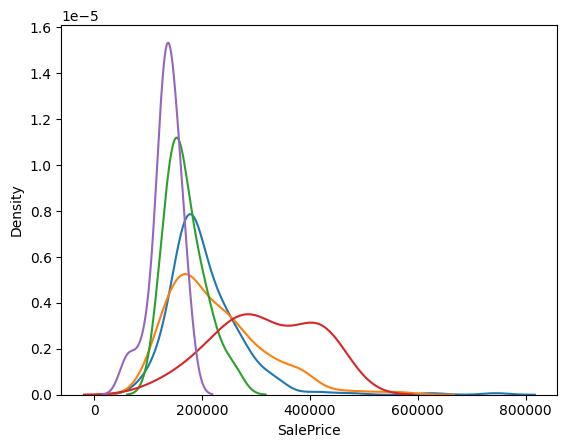

In [13]:
for category in xtrain['FireplaceQu'].dropna().unique():
    sb.kdeplot(xtrain[xtrain['FireplaceQu'] == category]['SalePrice'])

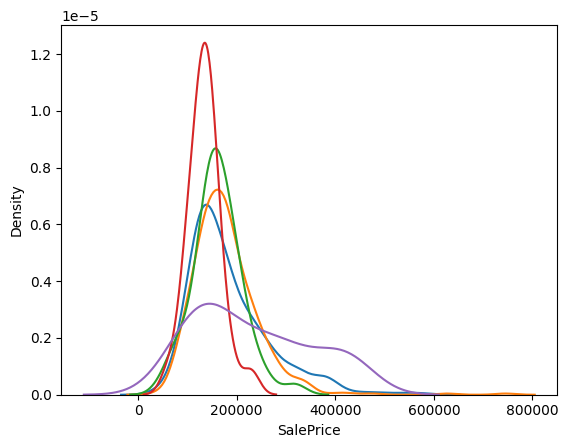

In [14]:
for category in xtrain['FireplaceQu_imputed'].dropna().unique():
    sb.kdeplot(xtrain[xtrain['FireplaceQu_imputed'] == category]['SalePrice'])